## Observations and Insights 

#### Your tasks are to do the following:

* Before beginning the analysis, check the data for duplicate mice and remove any data associated with that mouse ID.

* Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows  the number of mice per time point for each treatment regimen throughout the course of the study.

  * **NOTE:** These plots should look identical.

* Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.

  * **NOTE:** These plots should look identical.

* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

* Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.

* Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

* Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

* Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

Here are some final considerations:

* You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

* See the [starter workbook](Pymaceuticals/pymaceuticals_starter.ipynb) for help on what modules to import and expected format of the notebook.

## Hints and Considerations

* Be warned: These are very challenging tasks. Be patient with yourself as you trudge through these problems. They will take time and there is no shame in fumbling along the way. Data visualization is equal parts exploration, equal parts resolution.

* You have been provided a starter notebook. Use the code comments as a reminder of steps to follow as you complete the assignment.

* Don't get bogged down in small details. Always focus on the big picture. If you can't figure out how to get a label to show up correctly, come back to it. Focus on getting the core skeleton of your notebook complete. You can always revisit old problems.

* While you are trying to complete this assignment, feel encouraged to constantly refer to Stack Overflow and the Pandas documentation. These are needed tools in every data analyst's tool belt.

* Remember, there are many ways to approach a data problem. The key is to break up your task into micro tasks. Try answering questions like:

  * How does my DataFrame need to be structured for me to have the right _x_-axis and _y_-axis?

  * How do I build a basic scatter plot?

  * How do I add a label to that scatter plot?

  * Where would the labels for that scatter plot come from?

  Again, don't let the magnitude of a programming task scare you off. Ultimately, every programming problem boils down to a handful of bite-sized tasks.

* Get help when you need it! There is never any shame in asking. But, as always, ask a _specific_ question. You'll never get a great answer to "I'm lost."






## Setup

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [101]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [102]:
# Read in the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

### Take a peek under the hood

In [103]:
# Preview mouse dataframe
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [104]:
# Preview results dataframe
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


### Merge, Merge, Merge

In [105]:
# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


### Do a little Spring cleaning

In [106]:
# Count the total number of Mouse IDs (BEFORE DROPPING DUPLICATES) == 1,893
total_mice = merged_data['Mouse ID'].count()
total_mice

1893

In [107]:
# Before beginning the analysis, check the data for duplicate mice
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find any duplicate Mouse ID's
merged_data.loc[merged_data.duplicated(["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [108]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# 1) Need to use .loc to locate the exact locations of the mouse we want to drop
# .loc is a boolean
# .iloc uses indexes
merged_data.loc[merged_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [109]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# 2) Need to use .loc to return the locations of all mice EXCEPT the locations of the mouse we want to drop
merged_data.loc[merged_data["Mouse ID"] != "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [110]:
# Step 2: Use correct formula/code to establish new "clean" dataframe
cleaned_data = merged_data.loc[merged_data["Mouse ID"] != "g989"]
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [111]:
# Count the total number of Mouse IDs (AFTER DROPPING DUPLICATES)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [112]:
# Count the total number of Mouse IDs (AFTER DROPPING DUPLICATES)
cleaned_data.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [113]:
# Checking the number of BAD data mice still remaining in the DataFrame
cleaned_data.loc[cleaned_data["Mouse ID"] == "g989"].count()

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

#### Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

In [114]:
# Checking for NaN's
# How to DROP rows of "NaN"...first, run a code to display them:
#nan_df = combined_data[combined_data.isna().any(axis=1)]
#nan_df.head()

nan_df = cleaned_data[cleaned_data.isna().any(axis=1)]
nan_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [115]:
# Optional: Get all the data for the duplicate mouse ID.
# If time allows...

In [116]:
# Periodically get a snapshot of your column headings
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [117]:
# Cleaned data grouped by Mouse ID
cleaned_data.groupby('Mouse ID').count()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [118]:
# NOTES...

# Count distict values, use nunique:

# df['hID'].nunique()
# 5
# Count only non-null values, use count:

# df['hID'].count()
# 8
# Count total values including null values, use size attribute:

# df['hID'].size
# 8

In [119]:
# Take note of the error message (at the bottom) -- case sensitive!!!
cleaned_data['Mouse Id'].nunique()

KeyError: 'Mouse Id'

In [120]:
# Using original data set, compare orginal results vs the clean results (below)
merged_data['Mouse ID'].nunique()

249

In [121]:
# Using latest clean data set, compare results (unique number of mice)
cleaned_data['Mouse ID'].nunique()

248

## Summary Statistics

#### Summary Info

In [122]:
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [123]:
cleaned_data.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


#### Summary Table

In [124]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Create inital summary table with Drug Regimens and counts
summary_stats = pd.DataFrame(cleaned_data.groupby("Drug Regimen").count())

# Use groupby to create summary stats by drug regimen; add results into columns in summary_stats
summary_stats["Mean"] = pd.DataFrame(cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary_stats["Median"] = pd.DataFrame(cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summary_stats["Standard Deviation"] = pd.DataFrame(cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary_stats["Variance"] = pd.DataFrame(cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary_stats["SEM"] = pd.DataFrame(cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

# Clean up columns, just keeping a count column for some of the graphs below
summary_stats = summary_stats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

# Rename count column
summary_stats = summary_stats.rename(columns = {"Mouse ID" : "Trials"})

summary_stats.head()

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar Plots

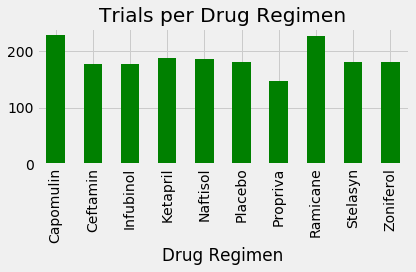

In [134]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_per_tp = summary_stats["Trials"]

# # Testing the comic book look
#mice_per_tp.plot(kind="bar")
#plt.xkcd

# Use DataFrame.plot() in order to create a bar chart of the data
mice_per_tp.plot(kind="bar", figsize=(6,4), color = "g", legend=False)

# Set a title for the chart
plt.title("Trials per Drug Regimen")

# Save and show the chart
plt.savefig('bar_graph1.png', dpi=300)
plt.tight_layout()
plt.show()

In [133]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# Try five-thirty-eight chart style
#plt.style.use("fivethirtyeight")

# Set x axis and tick locations
x_axis = np.arange(len(mice_per_tp))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, mice_per_tp["Trials"], color = "r", width = .5)
plt.xticks(tick_locations, mice_per_tp.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(mice_per_tp["Trials"])+10)

# Set a Title and labels
plt.title("Trials per Drug Regimen")
plt.xlabel("Drug Regimen")


# Save and show the chart
plt.savefig('bar_graph2.png', dpi=300)
plt.tight_layout()
plt.show()

KeyError: 'Trials'

<Figure size 432x288 with 0 Axes>

## Pie Plots

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Filter the DataFrame down only to those columns to chart
mice_per_tp = summary_stats[["Trials"]]

# Use DataFrame.plot() in order to create a bar chart of the data
plt.pie(mice_per_tp, explode=explode, labels=mice_per_tp.index.values, colors=colors,
autopct="%1.1f%%", shadow=True, startangle=140, subplots=True, legend=False)


#mice_per_tp.plot(kind="pie", explode=explode, labels=mice_per_tp.index.values, colors=colors,
#autopct="%1.1f%%", shadow=True, startangle=140, subplots=True,legend=False)

# Set a title for the chart
plt.title("Trials per Drug Regimen")

plt.show()

NameError: name 'colors' is not defined

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(mice_per_tp["Trials"], explode=explode, labels=mice_per_tp.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set a title for the chart
plt.title("Trials per Drug Regimen")

# Save an image of our chart and print the final product to the screen
plt.show()

NameError: name 'colors' is not defined

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


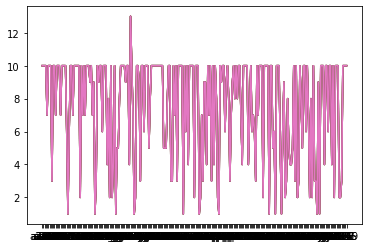

In [81]:
mouse_id = [mouse for mouse, df in merged_data.groupby('Mouse ID')]

plt.plot(mouse_id, merged_data.groupby(['Mouse ID']).count())

merged_data.groupby(['Mouse ID']).count()


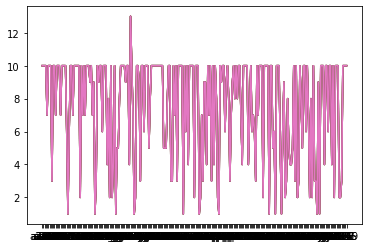

In [82]:
mouse_id = [mouse for mouse, df in merged_data.groupby('Mouse ID')]

plt.plot(mouse_id, merged_data.groupby(['Mouse ID']).count())

plt.show()

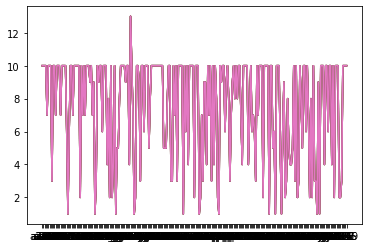

In [83]:
mouse_id = [mouse for mouse, df in merged_data.groupby('Mouse ID')]

plt.plot(mouse_id, merged_data.groupby(['Mouse ID']).count())
plt.xticks(mouse_id)

plt.show()

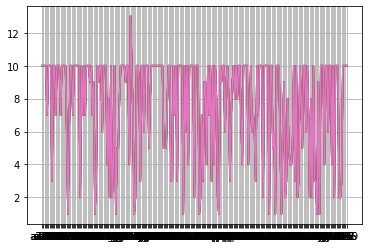

In [84]:
mouse_id = [mouse for mouse, df in merged_data.groupby('Mouse ID')]

plt.plot(mouse_id, merged_data.groupby(['Mouse ID']).count())
plt.xticks(mouse_id)
plt.grid()

plt.show()